In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("Employee.csv")

In [4]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [5]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [7]:
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [8]:
df.duplicated().sum()

1889

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.groupby("Education")["Age"].mean()

Education
Bachelors    31.306443
Masters      30.149137
PHD          29.769231
Name: Age, dtype: float64

In [11]:
df.groupby("Gender")["Age"].mean()

Gender
Female    30.737652
Male      31.126880
Name: Age, dtype: float64

In [12]:
df.sort_values(by="JoiningYear", ascending=False, inplace=True)

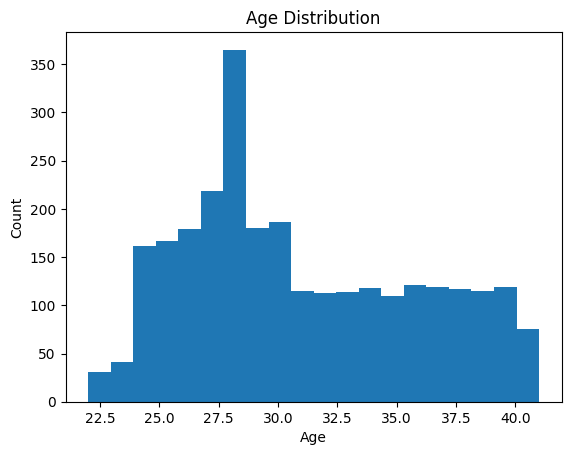

In [13]:
plt.hist(df["Age"], bins=20)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

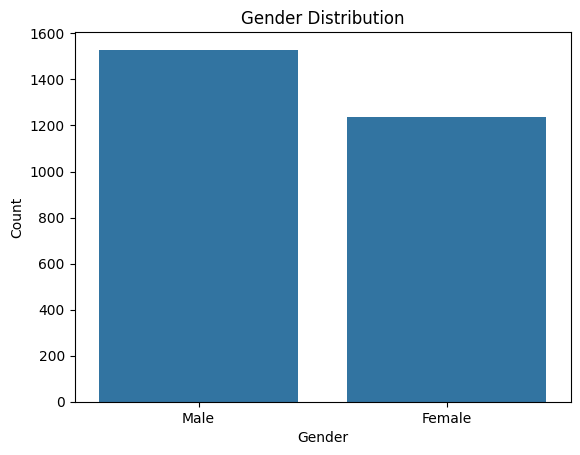

In [14]:
sns.countplot(data=df, x="Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()

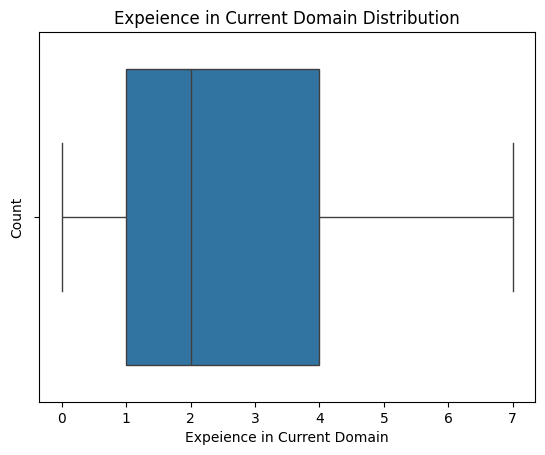

In [15]:
sns.boxplot(data=df, x="ExperienceInCurrentDomain")
plt.xlabel("Expeience in Current Domain")
plt.ylabel("Count")
plt.title("Expeience in Current Domain Distribution")
plt.show()


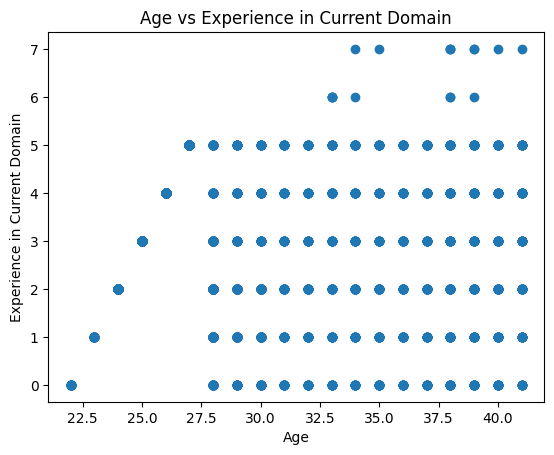

In [16]:
plt.scatter(df["Age"], df["ExperienceInCurrentDomain"])
plt.xlabel("Age")
plt.ylabel("Experience in Current Domain")
plt.title("Age vs Experience in Current Domain")
plt.show()

In [17]:
df.groupby("PaymentTier")["LeaveOrNot"].value_counts()

PaymentTier  LeaveOrNot
1            0              141
             1               77
2            1              343
             0              227
3            0             1308
             1              668
Name: count, dtype: int64

In [18]:
df[df["LeaveOrNot"] == 1]["PaymentTier"].mean()

2.5431985294117645

In [19]:
df.groupby("City")["City"].count()

City
Bangalore    1171
New Delhi     792
Pune          801
Name: City, dtype: int64

In [20]:
benched_percentage = df.groupby("EverBenched")['EverBenched'].count() / len(df) * 100

In [21]:
benched_percentage

EverBenched
No     86.939219
Yes    13.060781
Name: EverBenched, dtype: float64

In [22]:
df.groupby(["Education", "Gender"])["Age"].mean()

Education  Gender
Bachelors  Female    30.929530
           Male      31.619313
Masters    Female    30.348921
           Male      29.994429
PHD        Female    29.730159
           Male      29.795699
Name: Age, dtype: float64

In [23]:
df.groupby("PaymentTier")["ExperienceInCurrentDomain"].std()

PaymentTier
1    1.657295
2    1.543400
3    1.624992
Name: ExperienceInCurrentDomain, dtype: float64

In [24]:
df.groupby(["JoiningYear", "Gender"])["Gender"].count()

JoiningYear  Gender
2012         Female    127
             Male      181
2013         Female    175
             Male      221
2014         Female    163
             Male      222
2015         Female    265
             Male      199
2016         Female    123
             Male      187
2017         Female    284
             Male      378
2018         Female     98
             Male      141
Name: Gender, dtype: int64

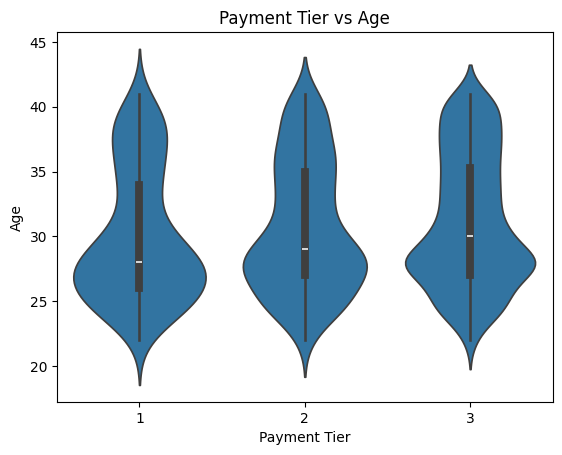

In [25]:
sns.violinplot(data = df, x = "PaymentTier", y = "Age")
plt.xlabel("Payment Tier")
plt.ylabel("Age")
plt.title("Payment Tier vs Age")
plt.show()

c:\Users\hpai\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


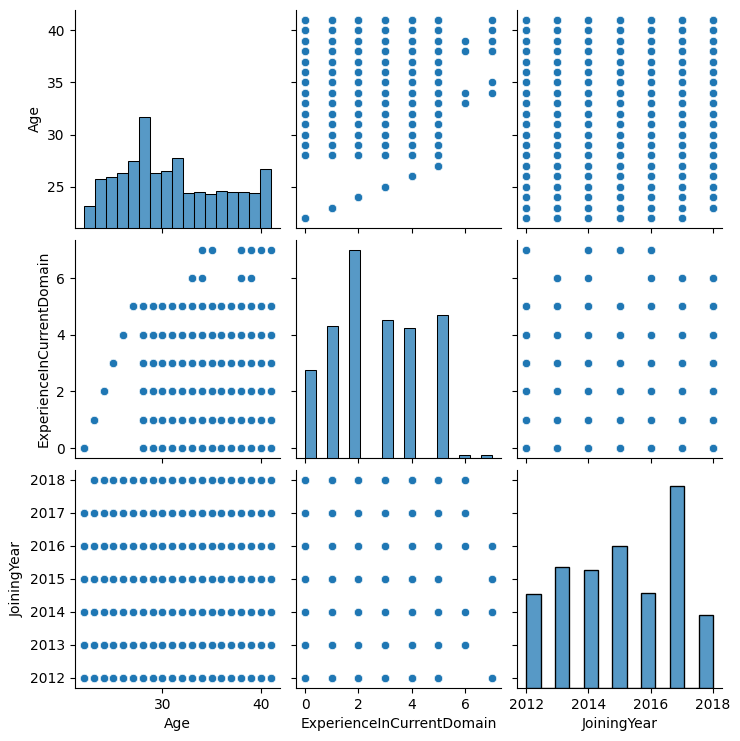

In [26]:
sns.pairplot(df[["Age", "ExperienceInCurrentDomain", "JoiningYear"]])
plt.show()

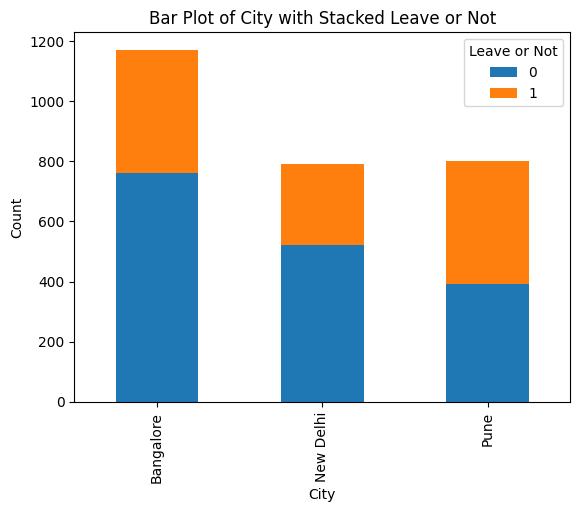

In [29]:
city_leave_counts = df.groupby("City")["LeaveOrNot"].value_counts().unstack()
city_leave_counts.plot(kind = "bar", stacked=True)
plt.xlabel("City")
plt.ylabel("Count")
plt.title("Bar Plot of City with Stacked Leave or Not")
plt.legend(title = "Leave or Not")
plt.show()

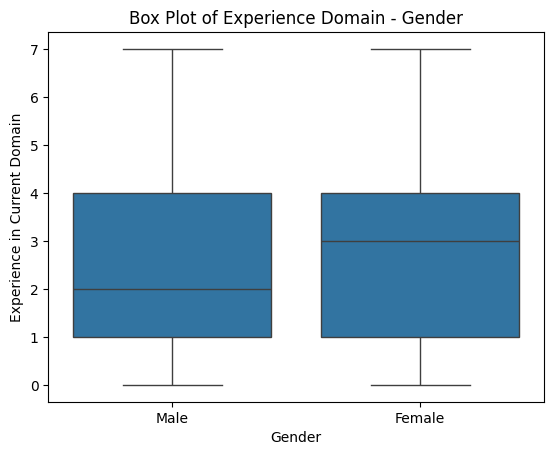

In [30]:
sns.boxplot(data = df, x="Gender", y="ExperienceInCurrentDomain")
plt.xlabel("Gender")
plt.ylabel("Experience in Current Domain")
plt.title("Box Plot of Experience Domain - Gender")
plt.show()